In [ ]:
#INF2178 Technical Assignment 1
#Name: KA YUEN LEE
#Student Number: 1010073974
#Professor: Shion Guha


In [1]:
# Load the libraries to use in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset from the Excel file
file_path = 'INF2178_A1_data.xlsx'
df = pd.read_excel(file_path)

df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [2]:
# Checking for any missing values within the dataset
missing_values = df.isnull().sum()
print(missing_values)

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64


In [4]:
# Calculate occupancy rate

df['OCCUPANCY_RATE_BEDS'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['OCCUPANCY_RATE_ROOMS'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']
df['OCCUPANCY_RATE'] = (df['OCCUPANCY_RATE_BEDS'].fillna(0) + df['OCCUPANCY_RATE_ROOMS'].fillna(0))

df.head(1)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552,0.896552


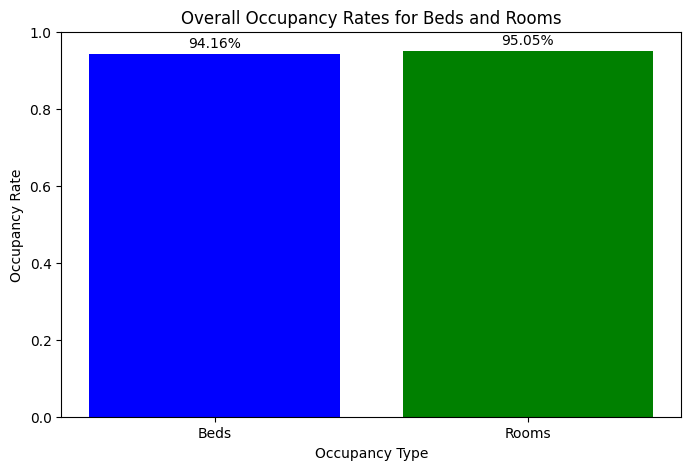

In [5]:
# Calculate overall occupancy rate for beds
overall_occupied_beds = df['OCCUPIED_BEDS'].sum()
overall_capacity_actual_beds = df['CAPACITY_ACTUAL_BED'].sum()
occupancy_rate_beds = overall_occupied_beds / overall_capacity_actual_beds

# Calculate overall occupancy rate for rooms
overall_occupied_rooms = df['OCCUPIED_ROOMS'].sum()
overall_capacity_actual_rooms = df['CAPACITY_ACTUAL_ROOM'].sum()
occupancy_rate_rooms = overall_occupied_rooms / overall_capacity_actual_rooms

categories = ['Beds', 'Rooms']
occupancy_rates = [occupancy_rate_beds, occupancy_rate_rooms]

plt.figure(figsize=(8, 5))
plt.bar(categories, occupancy_rates, color=['blue', 'green'], alpha=1)

# Set chart information
plt.ylim(0, 1)
plt.xlabel('Occupancy Type')
plt.ylabel('Occupancy Rate')
plt.title('Overall Occupancy Rates for Beds and Rooms')

# Showing the percentage
for i, rate in enumerate(occupancy_rates):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom')

# Show the bar chart
plt.show()

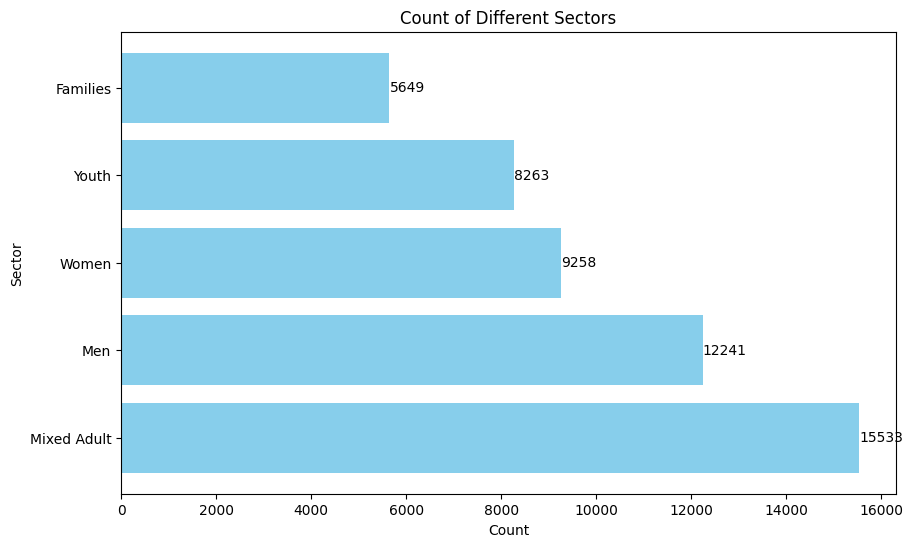

In [6]:
# Calculate the count for each sector
sector_counts = df['SECTOR'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sector_counts.index, sector_counts, color='skyblue', alpha=1)

# Set chart information
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Count of Different Sectors')
plt.grid(False)

# Display specific counts on the horizontal bars
for i, count in enumerate(sector_counts):
    plt.text(count + 1, i, str(count), ha='left', va='center')

# Show the horizontal bar chart
plt.show()

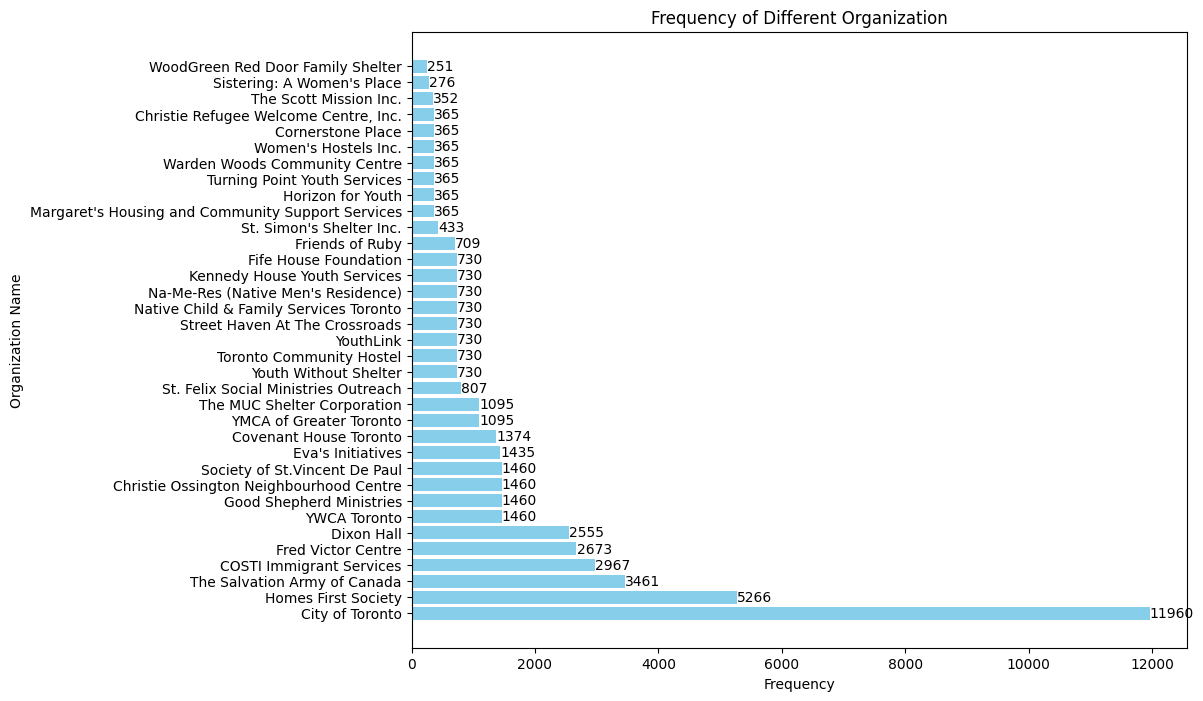

In [7]:
# Calculate the frequency of each organization
organization_counts = df['ORGANIZATION_NAME'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(organization_counts.index, organization_counts, color='skyblue', alpha=1)

# Set chart information
plt.xlabel('Frequency')
plt.ylabel('Organization Name')
plt.title('Frequency of Different Organization')
plt.grid(False)

# Display counts on the horizontal bars
for i, count in enumerate(organization_counts):
    plt.text(count + 1, i, str(count), ha='left', va='center')

# Show the horizontal bar chart
plt.show()

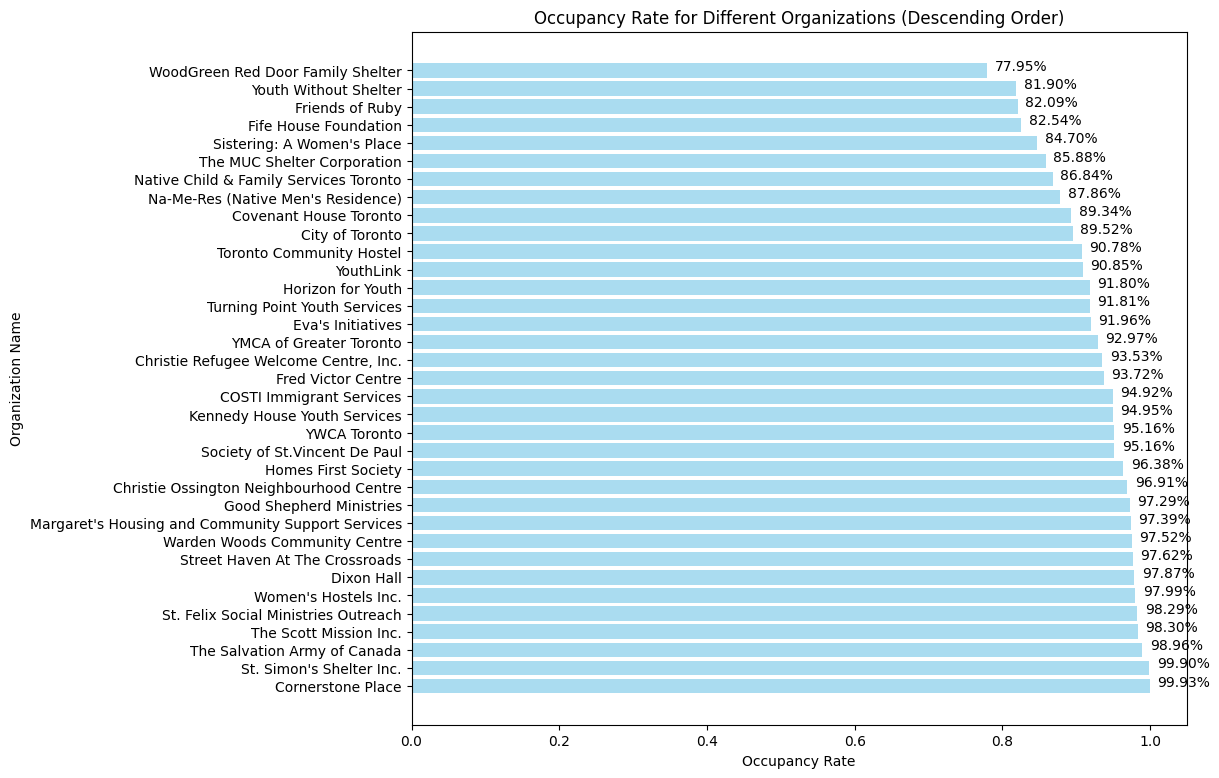

In [8]:
# Calculate the average occupancy rate for each organization
organization_occupancy = df.groupby('ORGANIZATION_NAME')['OCCUPANCY_RATE'].mean()

# Sort in descending order by occupancy rate
organization_occupancy = organization_occupancy.sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 9))
plt.barh(organization_occupancy.index, organization_occupancy, color='skyblue', alpha=0.7)

# Set chart information
plt.xlabel('Occupancy Rate')
plt.ylabel('Organization Name')
plt.title('Occupancy Rate for Different Organizations (Descending Order)')

# Display occupancy rates on the horizontal bar chart
for i, rate in enumerate(organization_occupancy):
    plt.text(rate + 0.01, i, f'{rate:.2%}')

# Show the horizontal bar chart
plt.show()

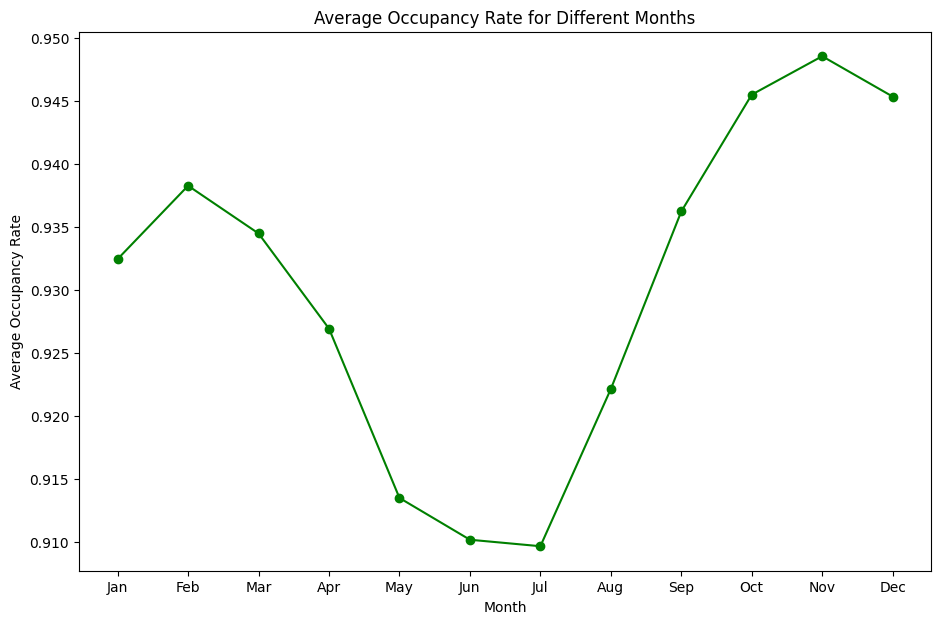

In [9]:
# Extract the month information
df['Month'] = df['OCCUPANCY_DATE'].dt.month

# Calculate the average occupancy rate for each month
monthly_occupancy = df.groupby('Month')['OCCUPANCY_RATE'].mean()

# Create a line plot
plt.figure(figsize=(11, 7))
plt.plot(monthly_occupancy.index, monthly_occupancy, marker='o', color='green', label='Monthly Occupancy Rate')

# Set chart properties
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.title('Average Occupancy Rate for Different Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the line plot
plt.show()

<ipython-input-10-214a80429a87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df, palette='Set2')


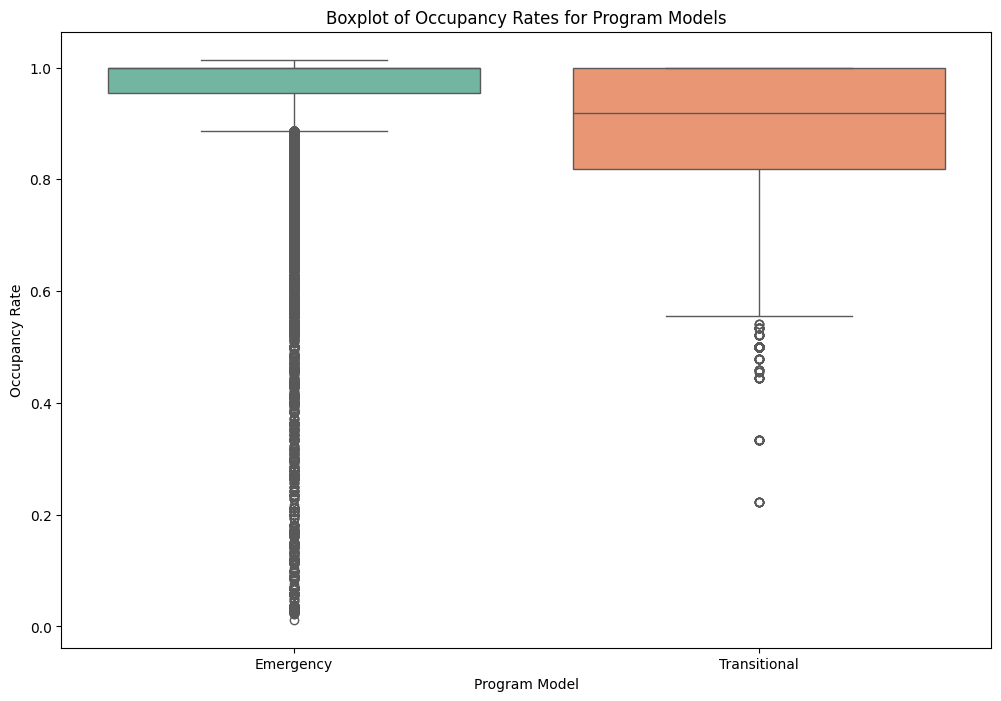

In [10]:
# Create a figure
plt.figure(figsize=(12, 8))

# Use seaborn to create a boxplot
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df)

# Set chart information
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate')
plt.title('Boxplot of Occupancy Rates for Program Models')

# Show the boxplot
plt.show()

In [11]:
# Extract occupancy rates for program models
emergency_occupancy = df[df['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_occupancy = df[df['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(emergency_occupancy, transitional_occupancy)

# Display the t-statistic and p-value
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: 39.07496980654136
P-Value: 0.0


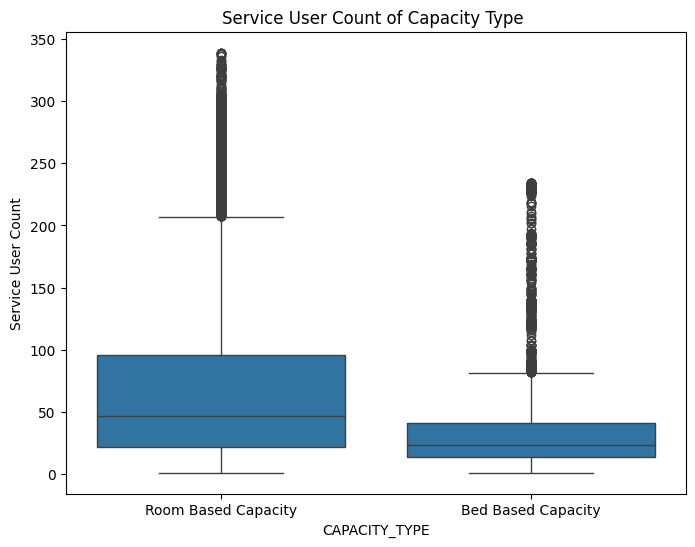

In [12]:
#Creat boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='CAPACITY_TYPE', y='SERVICE_USER_COUNT', data=df)
plt.xlabel('CAPACITY_TYPE')
plt.ylabel('Service User Count')
plt.title('Service User Count of Capacity Type ')
plt.show()

In [13]:
# Split the data into two groups
capacity_type1_data = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']
capacity_type2_data = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(capacity_type1_data, capacity_type2_data)

# Output the t-test results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 97.1228806296218
p-value: 0.0
